Epoch 1/50


C:\Users\SentDyem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


298/298 [==============================] - 1s 1ms/step - loss: 509.5561 - accuracy: 0.1831 - val_loss: 1.9177 - val_accuracy: 0.1956
Epoch 2/50
298/298 [==============================] - 0s 1ms/step - loss: 1.9004 - accuracy: 0.2140 - val_loss: 1.8858 - val_accuracy: 0.2554
Epoch 3/50
298/298 [==============================] - 0s 1ms/step - loss: 1.8732 - accuracy: 0.2627 - val_loss: 1.8648 - val_accuracy: 0.2554
Epoch 4/50
298/298 [==============================] - 0s 1ms/step - loss: 1.8560 - accuracy: 0.2627 - val_loss: 1.8528 - val_accuracy: 0.2554
Epoch 5/50
298/298 [==============================] - 0s 1ms/step - loss: 1.8462 - accuracy: 0.2627 - val_loss: 1.8462 - val_accuracy: 0.2554
Epoch 6/50
298/298 [==============================] - 0s 1ms/step - loss: 1.8407 - accuracy: 0.2627 - val_loss: 1.8424 - val_accuracy: 0.2554
Epoch 7/50
298/298 [==============================] - 0s 1ms/step - loss: 1.8376 - accuracy: 0.2627 - val_loss: 1.8404 - val_accuracy: 0.2554
Epoch 8/50
298/

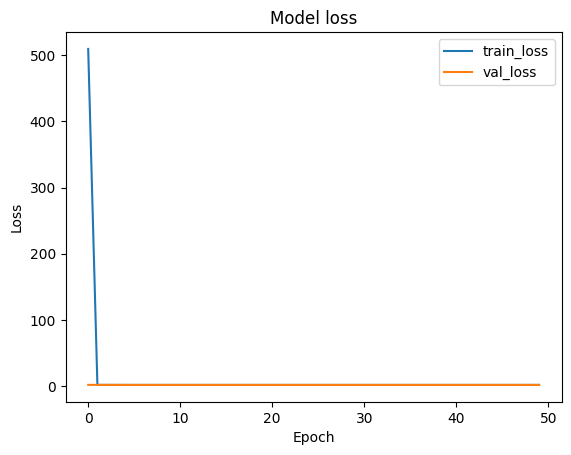

128/128 [==============================] - 0s 567us/step
Accuracy: 0.25538687561214496
Precision: 0.06522245623493321
Confusion matrix:
[[   0    0    0  395    0    0    0]
 [   0    0    0  161    0    0    0]
 [   0    0    0  479    0    0    0]
 [   0    0    0 1043    0    0    0]
 [   0    0    0  588    0    0    0]
 [   0    0    0  619    0    0    0]
 [   0    0    0  799    0    0    0]]


C:\Users\SentDyem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

data = pd.read_excel('dataset.xlsx')

X = data.drop('Class', axis=1)
y = data[['Class']]

le=LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=50, batch_size=32,
                    validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

y_test_pred = np.argmax(model.predict(X_test), axis=-1)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)

confusion = confusion_matrix(y_test, y_test_pred)

print("Confusion matrix:")
print(confusion)
